In [1]:
#!pip install mysql-connector-python
import mysql.connector as connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# check if the connection is established
mydb = connection.connect(host="localhost", user="root", passwd='1321',use_pure=True) #start connection
print(mydb.is_connected())
mydb.close() #close connection

True


In [5]:
mydb = connection.connect(host="localhost",user="root", passwd="1321",use_pure=True)
# check if the connection is established
query = "SHOW DATABASES"
cursor = mydb.cursor() #create a cursor to execute queries
cursor.execute(query)
print(cursor.fetchall())

[('bootcamp',), ('countries',), ('demo_trigger',), ('employees',), ('information_schema',), ('innomatics',), ('learndb',), ('learndb2',), ('library',), ('location',), ('mobile_phones',), ('mysql',), ('netflix',), ('ouickcommerce',), ('performance_schema',), ('phones',), ('pointstable',), ('productdb',), ('quickcommerce',), ('sakila',), ('student',), ('students',), ('sys',), ('world',)]


In [11]:
mydb = connection.connect(host="localhost", database = 'library',user="root", passwd="1321",use_pure=True)
print(mydb.is_connected())
query = """SELECT lb.library_branch_BranchName , count(*) books_loaned_out
FROM 
tbl_book_loans bl
JOIN
tbl_library_branch lb
ON bl.book_loans_BranchID = lb.library_branch_BranchID
GROUP BY lb.library_branch_BranchName;"""
cursor = mydb.cursor()
cursor.execute(query)
for result in cursor.fetchall():
    print(result)
    
mydb.close()

True
('Sharpstown', 10)
('Central', 11)
('Saline', 10)
('Ann Arbor', 20)


##  For each library branch, retrieve the branch name and the total number of books loaned out from that branch.(GRAPH)


In [43]:

import pandas as pd


mydb = connection.connect(
    host="localhost",
    database='library',
    user="root",
    passwd="1321",
    use_pure=True
)

print(mydb.is_connected())


query = """
SELECT lb.library_branch_BranchName, COUNT(*) AS books_loaned_out
FROM tbl_book_loans bl
JOIN tbl_library_branch lb ON bl.book_loans_BranchID = lb.library_branch_BranchID
GROUP BY lb.library_branch_BranchName;
"""


cursor = mydb.cursor()
cursor.execute(query)


df1 = pd.DataFrame(cursor.fetchall(), columns=['BranchName', 'BooksLoanedOut'])


print(df1)


cursor.close()
mydb.close()

True
   BranchName  BooksLoanedOut
0  Sharpstown              10
1     Central              11
2      Saline              10
3   Ann Arbor              20


In [45]:
df1

,BranchName,BooksLoanedOut
0,Sharpstown,10
1,Central,11
2,Saline,10
3,Ann Arbor,20


C:\Users\shubh\AppData\Local\Temp\ipykernel_11876\3783802216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df1 , x = 'BranchName' , y = 'BooksLoanedOut' , palette = 'rocket')


<Axes: xlabel='BranchName', ylabel='BooksLoanedOut'>

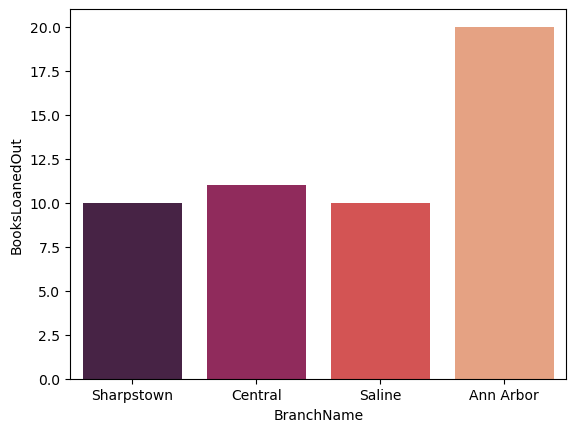

In [47]:
sns.barplot(data = df1 , x = 'BranchName' , y = 'BooksLoanedOut' , palette = 'rocket')

In [84]:
branchname = df1.columns[1]
branchname

'BooksLoanedOut'

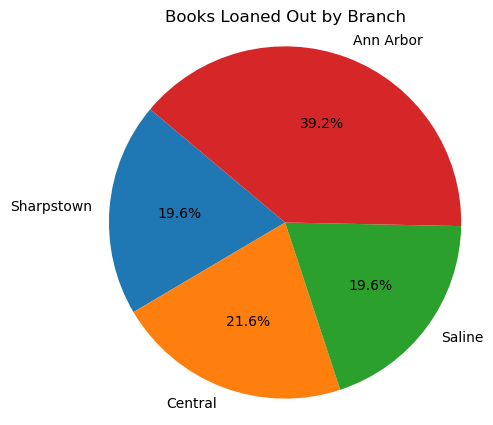

In [94]:
plt.figure(figsize=(5 , 5))
plt.pie(df1['BooksLoanedOut'], labels=df1['BranchName'], autopct='%1.1f%%', startangle=140)
plt.title('Books Loaned Out by Branch')
plt.axis('equal')  
plt.show()

##  Retrieve the names, addresses, and number of books checked out for all borrowers who have more than five books checked out.(GRAPH)

In [7]:

import pandas as pd

# Connect to MySQL
mydb = connection.connect(
    host="localhost",
    database='library',
    user="root",
    passwd="1321",
    use_pure=True
)

print(mydb.is_connected())

# Define and execute query
query = """
SELECT br.borrower_BorrowerName , br.borrower_BorrowerAddress , count(*) book_count_more_than_five
FROM 
tbl_book_loans bl
JOIN
tbl_borrower br
ON bl.book_loans_CardNo = br.borrower_CardNo
GROUP BY br.borrower_BorrowerName , br.borrower_BorrowerAddress
HAVING book_count_more_than_five > 5;
"""

# Create cursor and fetch results
cursor = mydb.cursor()
cursor.execute(query)

# Create DataFrame from results
df2 = pd.DataFrame(cursor.fetchall(), columns=['Borrower_Name' , 'Borrower_Address' , 'count'])

# Print DataFrame
print(df2)

# Cleanup
cursor.close()
mydb.close()

True
     Borrower_Name                        Borrower_Address  count
0        Joe Smith     1321 4th Street, New York, NY 10014      7
1           Tom Li    981 Main Street, Ann Arbor, MI 48104     14
2  Angela Thompson  2212 Green Avenue, Ann Arbor, MI 48104     11
3    Tom Haverford      23 75th Street, New York, NY 10014      6
4  Michael Horford    653 Glen Avenue, Ann Arbor, MI 48104      8


In [9]:
df2

,Borrower_Name,Borrower_Address,count
0,Joe Smith,"1321 4th Street, New York, NY 10014",7
1,Tom Li,"981 Main Street, Ann Arbor, MI 48104",14
2,Angela Thompson,"2212 Green Avenue, Ann Arbor, MI 48104",11
3,Tom Haverford,"23 75th Street, New York, NY 10014",6
4,Michael Horford,"653 Glen Avenue, Ann Arbor, MI 48104",8


C:\Users\shubh\AppData\Local\Temp\ipykernel_11876\4140271799.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df2 , x = 'count' , y = 'Borrower_Name' , palette = 'rocket' , orient = 'h')


<Axes: xlabel='count', ylabel='Borrower_Name'>

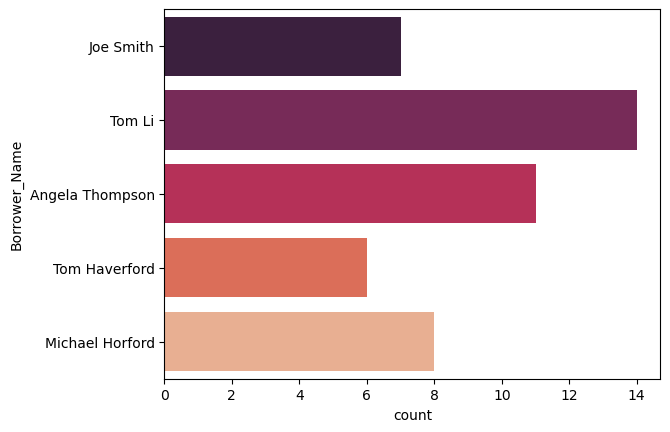

In [63]:
sns.barplot(data = df2 , x = 'count' , y = 'Borrower_Name' , palette = 'rocket' , orient = 'h')

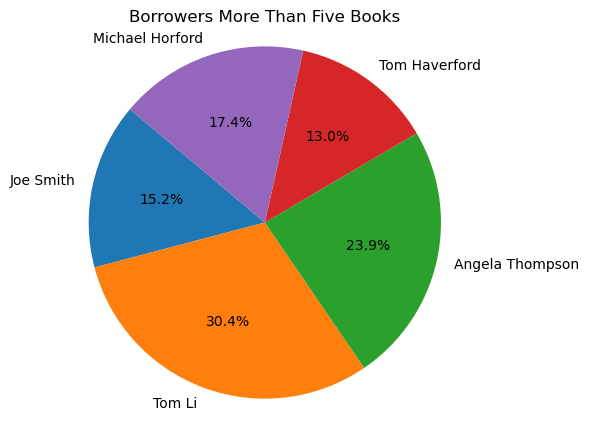

In [11]:
plt.figure(figsize=(5 , 5))
plt.pie(df2['count'], labels=df2['Borrower_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Borrowers More Than Five Books')
plt.axis('equal')  
plt.show()

In [121]:

import pandas as pd

# Connect to MySQL
mydb = connection.connect(
    host="localhost",
    database='library',
    user="root",
    passwd="1321",
    use_pure=True
)

print(mydb.is_connected())

# Define and execute query
query = """
SELECT 
    lb.library_branch_BranchName,
    count(bc.book_copies_No_Of_Copies) AS Total_Copies,
    (SELECT COUNT(*) 
     FROM tbl_book_loans bl 
     WHERE bl.book_loans_BranchID = lb.library_branch_BranchID) AS Book_loaned
FROM 
    tbl_library_branch lb
LEFT JOIN 
    tbl_book_copies bc ON lb.library_branch_BranchID = bc.book_copies_BranchID
GROUP BY 
    lb.library_branch_BranchID, lb.library_branch_BranchName;
"""

# Create cursor and fetch results
cursor = mydb.cursor()
cursor.execute(query)

# Create DataFrame from results
df3 = pd.DataFrame(cursor.fetchall(), columns=['Branch_Name'  , 'Total_Copies' , 'Book_loaned'])

# Print DataFrame
print(df3)

# Cleanup
cursor.close()
mydb.close()

True
  Branch_Name  Total_Copies  Book_loaned
0  Sharpstown            20           10
1     Central            20           11
2      Saline            20           10
3   Ann Arbor            20           20


In [123]:
df3

,Branch_Name,Total_Copies,Book_loaned
0,Sharpstown,20,10
1,Central,20,11
2,Saline,20,10
3,Ann Arbor,20,20


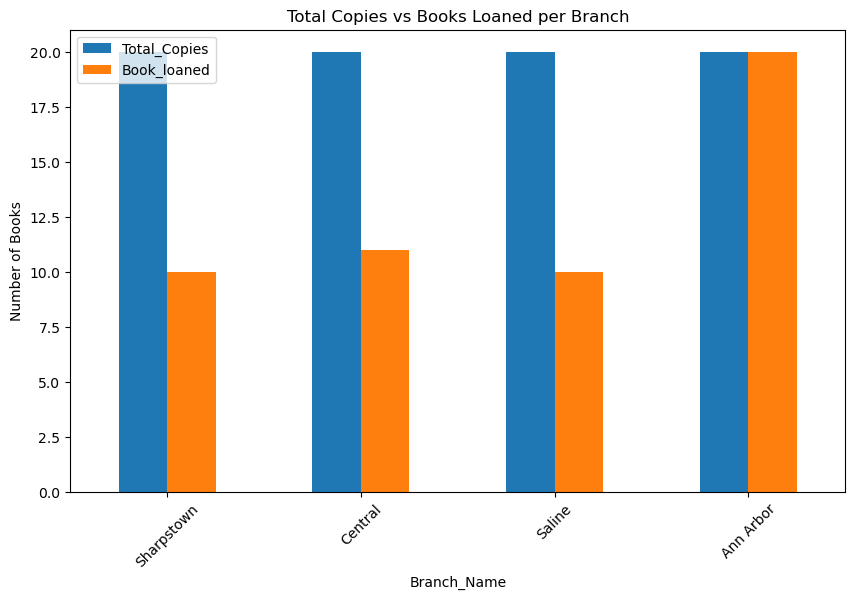

In [127]:
df3.plot(x='Branch_Name', kind='bar', y=['Total_Copies', 'Book_loaned'], figsize=(10,6))
plt.title('Total Copies vs Books Loaned per Branch')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()


In [7]:

import pandas as pd

# Connect to MySQL
mydb = connection.connect(
    host="localhost",
    database='library',
    user="root",
    passwd="1321",
    use_pure=True
)

print(mydb.is_connected())

# Define and execute query
query = """
SELECT 
    lb.library_branch_BranchName AS Branch,
    DATE_FORMAT(bl.DateOut, '%Y-%m') AS LoanMonth,
    COUNT(*) AS BooksLoaned
FROM 
    tbl_book_loans bl
JOIN 
    tbl_library_branch lb ON bl.book_loans_BranchID = lb.library_branch_BranchID
GROUP BY 
    lb.library_branch_BranchName, LoanMonth
ORDER BY 
    LoanMonth, lb.library_branch_BranchName;
"""

# Create cursor and fetch results
cursor = mydb.cursor()
cursor.execute(query)

# Create DataFrame from results
df4 = pd.DataFrame(cursor.fetchall(), columns=['Branch'  , 'LoanMonth' , 'Booksloaned'])

# Print DataFrame
print(df4)

# Cleanup
cursor.close()
mydb.close()

True
       Branch LoanMonth  Booksloaned
0   Ann Arbor   2017-02            1
1     Central   2017-12            3
2      Saline   2017-12            1
3   Ann Arbor   2018-01           19
4     Central   2018-01            7
5      Saline   2018-01            9
6  Sharpstown   2018-01           10
7     Central   2018-02            1


In [9]:
df_pivot = df4.pivot(index='LoanMonth', columns='Branch', values='Booksloaned').fillna(0).astype(int)
df_pivot.head()


Branch,Ann Arbor,Central,Saline,Sharpstown
LoanMonth,,,,
2017-02,1,0,0,0
2017-12,0,3,1,0
2018-01,19,7,9,10
2018-02,0,1,0,0


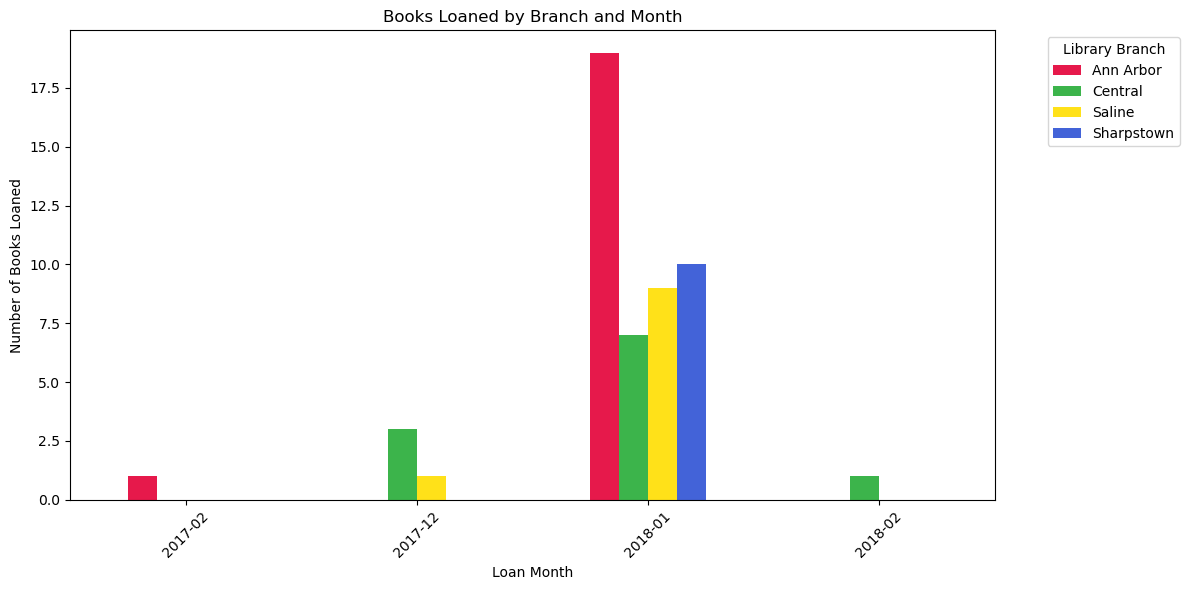

In [13]:
custom_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8']
df_pivot.plot(kind='bar', figsize=(12, 6) , color=custom_colors)
plt.title("Books Loaned by Branch and Month")
plt.ylabel("Number of Books Loaned")
plt.xlabel("Loan Month")
plt.xticks(rotation=45)
plt.legend(title='Library Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [17]:

import pandas as pd

# Connect to MySQL
mydb = connection.connect(
    host="localhost",
    database='library',
    user="root",
    passwd="1321",
    use_pure=True
)

print(mydb.is_connected())

# Define and execute query
query = """
SELECT 
    lb.library_branch_BranchName AS Branch,
    b.book_Title AS BookTitle,
    COUNT(*) AS TimesLoaned
FROM 
    tbl_book_loans bl
JOIN 
    tbl_book b ON bl.book_loans_BookID = b.book_BookId
JOIN 
    tbl_library_branch lb ON bl.book_loans_BranchID = lb.library_branch_BranchID
GROUP BY 
    lb.library_branch_BranchName, b.book_Title
ORDER BY 
    TimesLoaned DESC;
"""

# Create cursor and fetch results
cursor = mydb.cursor()
cursor.execute(query)

# Create DataFrame from results
df5 = pd.DataFrame(cursor.fetchall(), columns=['Branch'  , 'BookTitle' , 'TimesLoaned'])

# Print DataFrame
print(df5)

# Cleanup
cursor.close()
mydb.close()

True
        Branch                                        BookTitle  TimesLoaned
0    Ann Arbor                             The Name of the Wind            4
1    Ann Arbor                                             Dune            2
2      Central                                A Game of Thrones            2
3       Saline                                            Holes            2
4       Saline                               The Princess Bride            2
5    Ann Arbor                                   The Lost Tribe            2
6    Ann Arbor                                   The Green Mile            2
7    Ann Arbor                       The Fellowship of the Ring            2
8    Ann Arbor                                  Brave New World            2
9    Ann Arbor              The Hitchhikers Guide to the Galaxy            2
10   Ann Arbor  Hard Boiled Wonderland and The End of the World            2
11   Ann Arbor                                 A Wise Mans Fear        

In [19]:

top_books = df5.groupby('BookTitle')['TimesLoaned'].sum().nlargest(5).index
df_top = df5[df5['BookTitle'].isin(top_books)]


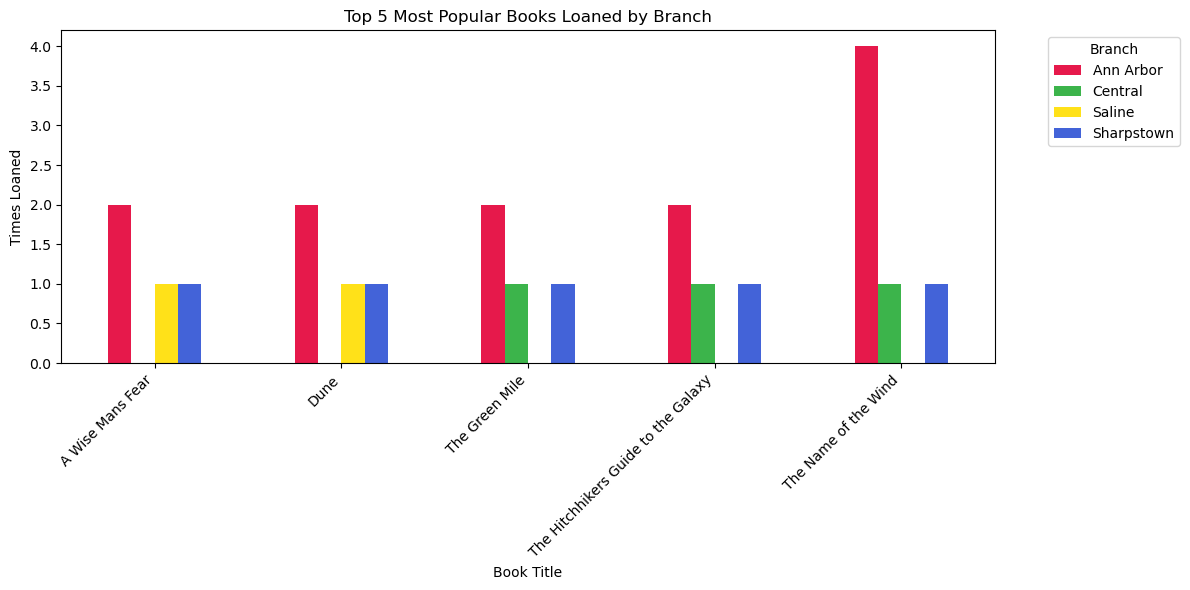

In [23]:
custom_colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8']
df_pivot = df_top.pivot(index='BookTitle', columns='Branch', values='TimesLoaned').fillna(0)

# Plot
df_pivot.plot(kind='bar', figsize=(12, 6) , color = custom_colors)
plt.title("Top 5 Most Popular Books Loaned by Branch")
plt.ylabel("Times Loaned")
plt.xlabel("Book Title")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [5]:
import mysql.connector as connection
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MySQL
mydb = connection.connect(
    host="localhost",
    database='library',
    user="root",
    passwd="1321",
    use_pure=True
)

query = """
SELECT 
    ba.book_authors_AuthorName AS Author,
    lb.library_branch_BranchName AS Branch,
    COUNT(*) AS BooksLoaned
FROM 
    tbl_book_loans bl
JOIN 
    tbl_book b ON bl.book_loans_BookID = b.book_BookId
JOIN 
    tbl_book_authors ba ON b.book_BookId = ba.book_author_BookID
JOIN 
    tbl_library_branch lb ON bl.book_loans_BranchID = lb.library_branch_BranchID
GROUP BY 
    ba.book_authors_AuthorName, lb.library_branch_BranchName
ORDER BY 
    BooksLoaned DESC;
"""

df6 = pd.read_sql(query, mydb)
mydb.close()


C:\Users\shubh\AppData\Local\Temp\ipykernel_13272\15625483.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df6 = pd.read_sql(query, mydb)


In [7]:
top_authors = df6.groupby('Author')['BooksLoaned'].sum().nlargest(5).index
df_top = df6[df6['Author'].isin(top_authors)]


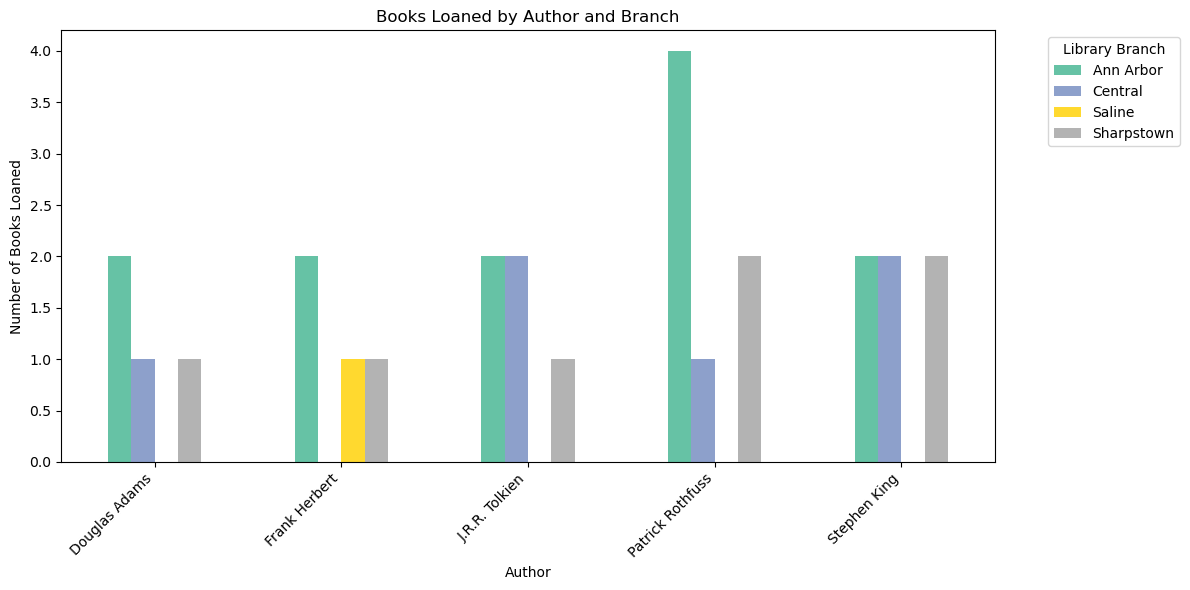

In [9]:
df_pivot = df_top.pivot(index='Author', columns='Branch', values='BooksLoaned').fillna(0).astype(int)

df_pivot.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Books Loaned by Author and Branch")
plt.ylabel("Number of Books Loaned")
plt.xlabel("Author")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Library Branch', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
